# Indoor requirement

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from __future__ import division  

/Users/xinyuyangren/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [4]:
class benchmark:
    
    data = 0
    unmet = {}
    unmet_percent = {}
    co2_unmet = {}
    co2_unmet_percent = {}
    
    def __init__(self, path):
        self.path = path
        
    def csvload(self):
        data = pd.read_csv(self.path)
        data.dropna()
        self.data = data
        
    def time_format(self):
        self.data['dt'] = pd.to_datetime(self.data['dt'])
    
    def t_plot(self):
        
        fig, axes = plt.subplots(ncols=1, nrows=5,figsize = (18,39))
        fig.suptitle('Indoor air temperature', fontsize=20)
        axes[0].plot(self.data.dt,self.data.t_lr)
        axes[0].plot(self.data.dt,self.data.t_br2)
        axes[0].plot(self.data.dt,self.data.t_br3)
        axes[0].set_xlabel('Date')
        axes[0].set_ylabel('Indoor temperature')
        axes[0].set_ylim(10,35)
        axes[0].axhline(y=16, linewidth=0.8,zorder=0)
        axes[0].axhline(y=25.5, linewidth=0.8,zorder=0)
        axes[0].legend(('lr','br2','br3'),loc='best') 
        
        axes[1].plot(self.data.dt,self.data.t_lr)
        axes[1].set_xlabel('Date')
        axes[1].set_ylabel('Living room Indoor temperature')
        axes[1].set_ylim(10,35)
        axes[1].axhline(y=16, linewidth=0.8,zorder=0)
        axes[1].axhline(y=25.5, linewidth=0.8,zorder=0)
        
        
        axes[2].plot(self.data.dt,self.data.t_br2)
        axes[2].set_xlabel('Date')
        axes[2].set_ylabel('Bedroom 2 Indoor temperature')
        axes[2].set_ylim(10,35)
        axes[2].axhline(y=16, linewidth=0.8)
        axes[2].axhline(y=25.5, linewidth=0.8)
        
        
        axes[3].plot(self.data.dt,self.data.t_br3)
        axes[3].set_xlabel('Date')
        axes[3].set_ylabel('Bedroom 3 Indoor temperature')
        axes[3].set_ylim(10,35)
        axes[3].axhline(y=16, linewidth=0.8,zorder=0)
        axes[3].axhline(y=25.5, linewidth=0.8,zorder=0)
        
        axes[4] = sns.boxplot(data=self.data,order=['t_lr', 't_br2','t_br3'],width=0.1)
        axes[4].axhline(y=16, linewidth=0.8,zorder=0)
        axes[4].axhline(y=25.5, linewidth=0.8,zorder=0)
        
        fig.savefig('1.jpg')
        
    def t_count(self):
        
        self.unmet['t_lr_over'] = np.where(self.data.t_lr > 25.5)[0]
        self.unmet['t_br2_over'] = np.where(self.data.t_br2 > 25.5)[0]
        self.unmet['t_br3_over'] = np.where(self.data.t_br3 > 25.5)[0]
        self.unmet['t_lr_below'] = np.where(self.data.t_lr < 16)[0]
        self.unmet['t_br2_below'] = np.where(self.data.t_br2 < 16)[0]
        self.unmet['t_br3_below'] = np.where(self.data.t_br3 < 16)[0]
        
        self.unmet_percent['t_lr_over'] = len(b.unmet['t_lr_over'])/len(self.data.t_lr)
        self.unmet_percent['t_br2_over'] = len(b.unmet['t_br2_over'])/len(self.data.t_br2)
        self.unmet_percent['t_br3_over'] = len(b.unmet['t_br3_over'])/len(self.data.t_br3)
        self.unmet_percent['t_lr_below'] = len(b.unmet['t_lr_below'])/len(self.data.t_lr)
        self.unmet_percent['t_br2_below'] = len(b.unmet['t_br2_below'])/len(self.data.t_br2)
        self.unmet_percent['t_br3_below'] = len(b.unmet['t_br3_below'])/len(self.data.t_br3)
    
    def co2_count(self):
        
        self.co2_unmet['co2_lr_over'] = np.where(self.data.co2_lr > 1200)[0]
        self.co2_unmet['co2_br2_over'] = np.where(self.data.co2_br2 > 1200)[0]
        self.co2_unmet['co2_br3_over'] = np.where(self.data.co2_br3 > 1200)[0]
       
        self.co2_unmet_percent['co2_lr_over'] = len(b.co2_unmet['co2_lr_over'])/len(self.data.t_lr)
        self.co2_unmet_percent['co2_br2_over'] = len(b.co2_unmet['co2_br2_over'])/len(self.data.t_br2)
        self.co2_unmet_percent['co2_br3_over'] = len(b.co2_unmet['co2_br3_over'])/len(self.data.t_br3)
        
    def co2_plot(self):
        
        fig, axes = plt.subplots(ncols=1, nrows=5,figsize = (18,39))
        fig.suptitle('CO2 Concentration', fontsize=20)
        axes[0].plot(self.data.dt,self.data.co2_lr)
        axes[0].plot(self.data.dt,self.data.co2_br2)
        axes[0].plot(self.data.dt,self.data.co2_br3)
        axes[0].set_xlabel('Date')
        axes[0].set_ylabel('CO2 Concentration')
        #axes[0].set_ylim(10,35)
        axes[0].axhline(y=1200, linewidth=0.8)
        axes[0].legend(('lr','br2','br3'),loc='best') 
        
        axes[1].plot(self.data.dt,self.data.co2_lr)
        axes[1].set_xlabel('Date')
        axes[1].set_ylabel('Living room CO2 Concentration')
        #axes[1].set_ylim(10,35)
        axes[1].axhline(y=1200, linewidth=0.8)
        
        
        axes[2].plot(self.data.dt,self.data.co2_br2)
        axes[2].set_xlabel('Date')
        axes[2].set_ylabel('Bedroom 2 CO2 Concentration')
        #axes[2].set_ylim(10,35)
        axes[2].axhline(y=1200, linewidth=0.8)
    
        
        
        axes[3].plot(self.data.dt,self.data.co2_br3)
        axes[3].set_xlabel('Date')
        axes[3].set_ylabel('Bedroom 3 CO2 Concentration')
        #axes[3].set_ylim(10,35)
        axes[3].axhline(y=1200, linewidth=0.8)
       
        
        axes[4] = sns.violinplot(data=self.data,order=['co2_lr', 'co2_br2','co2_br3'],width=0.1)
        axes[4].axhline(y=1200, linewidth=0.8)
        
        #fig.savefig('1.jpg')

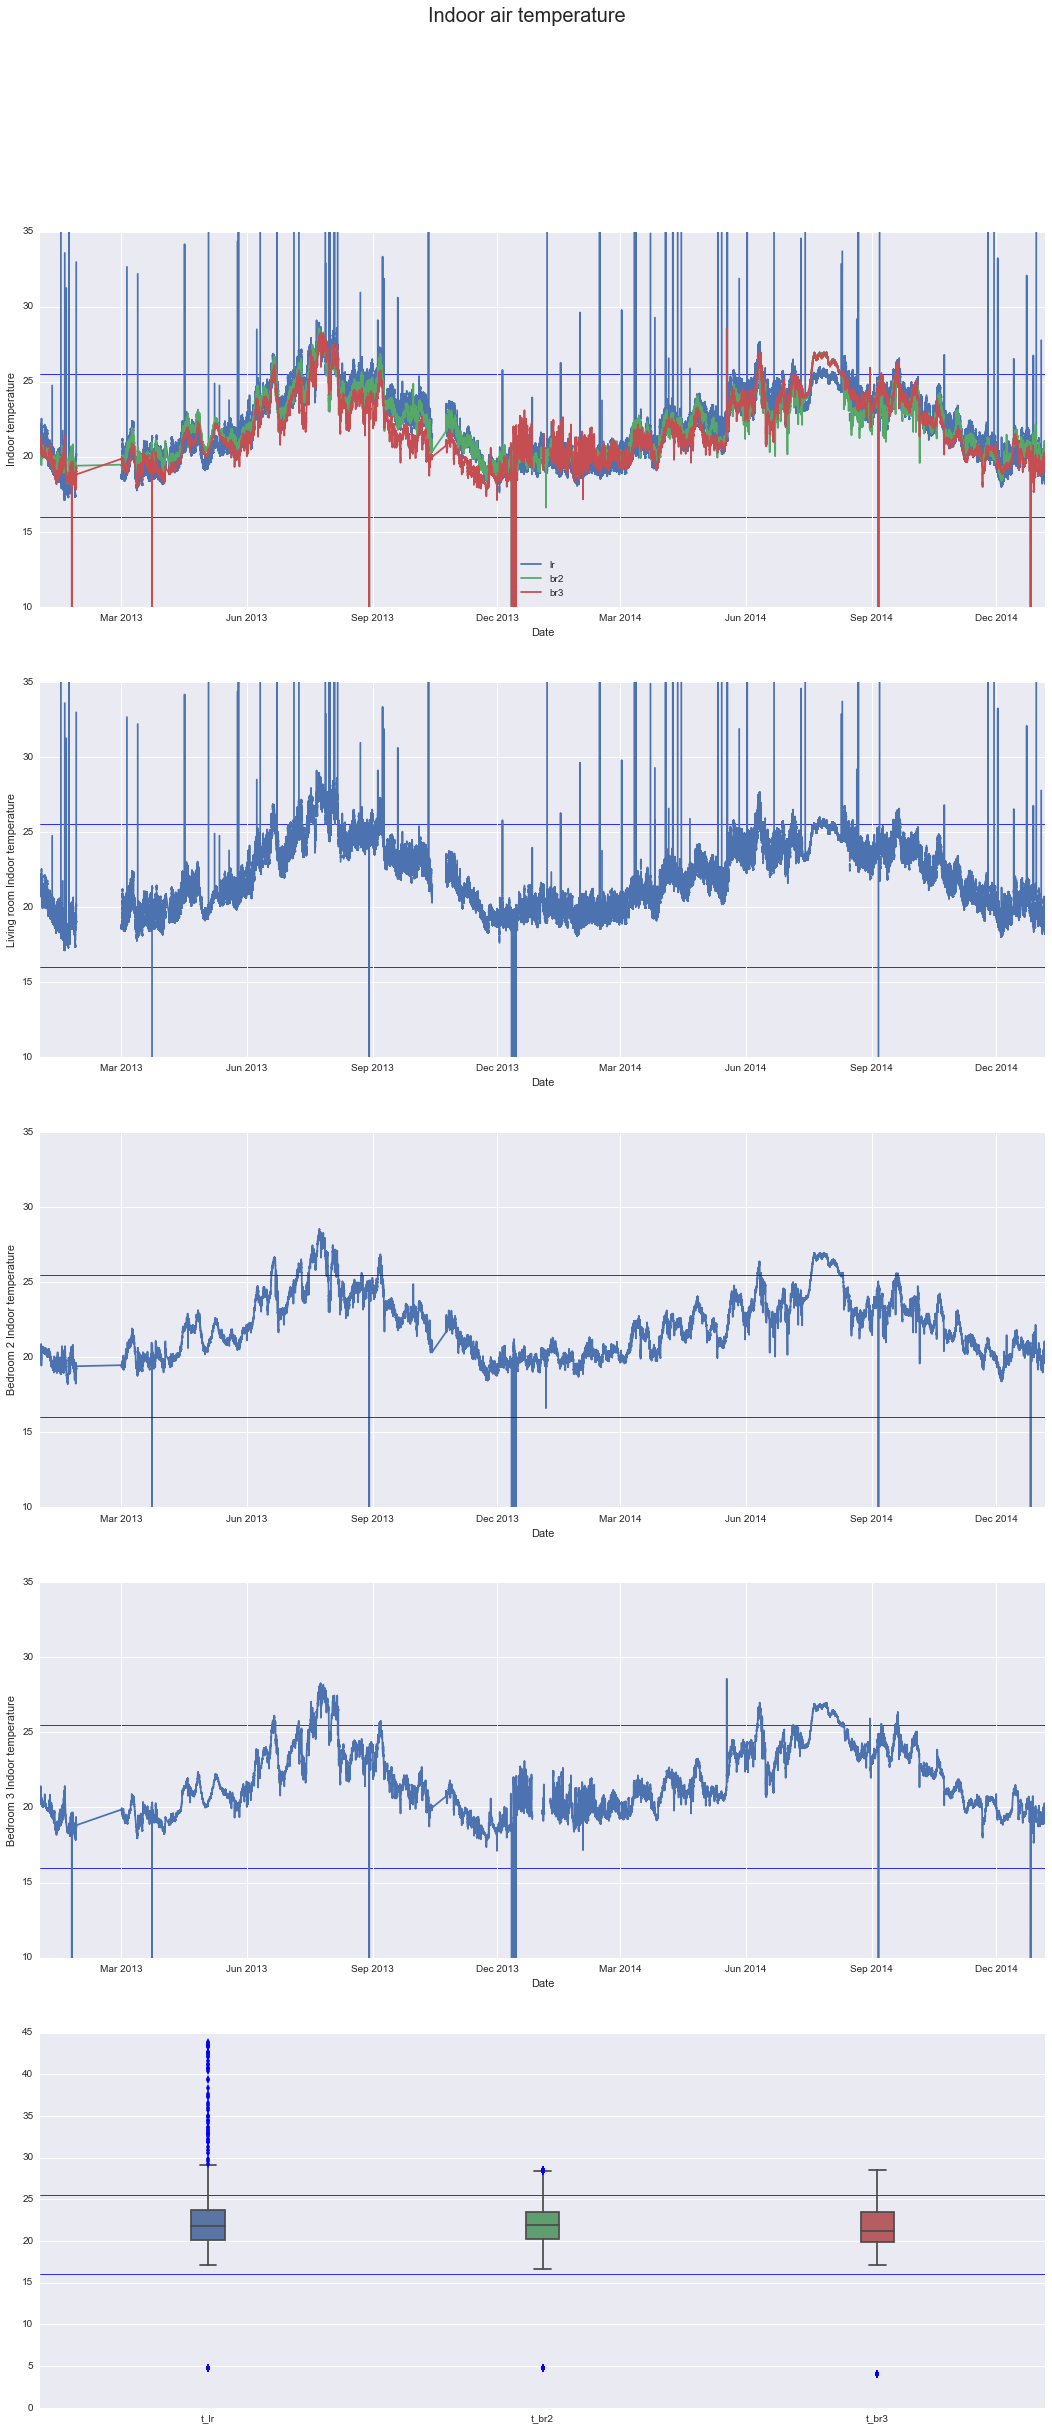

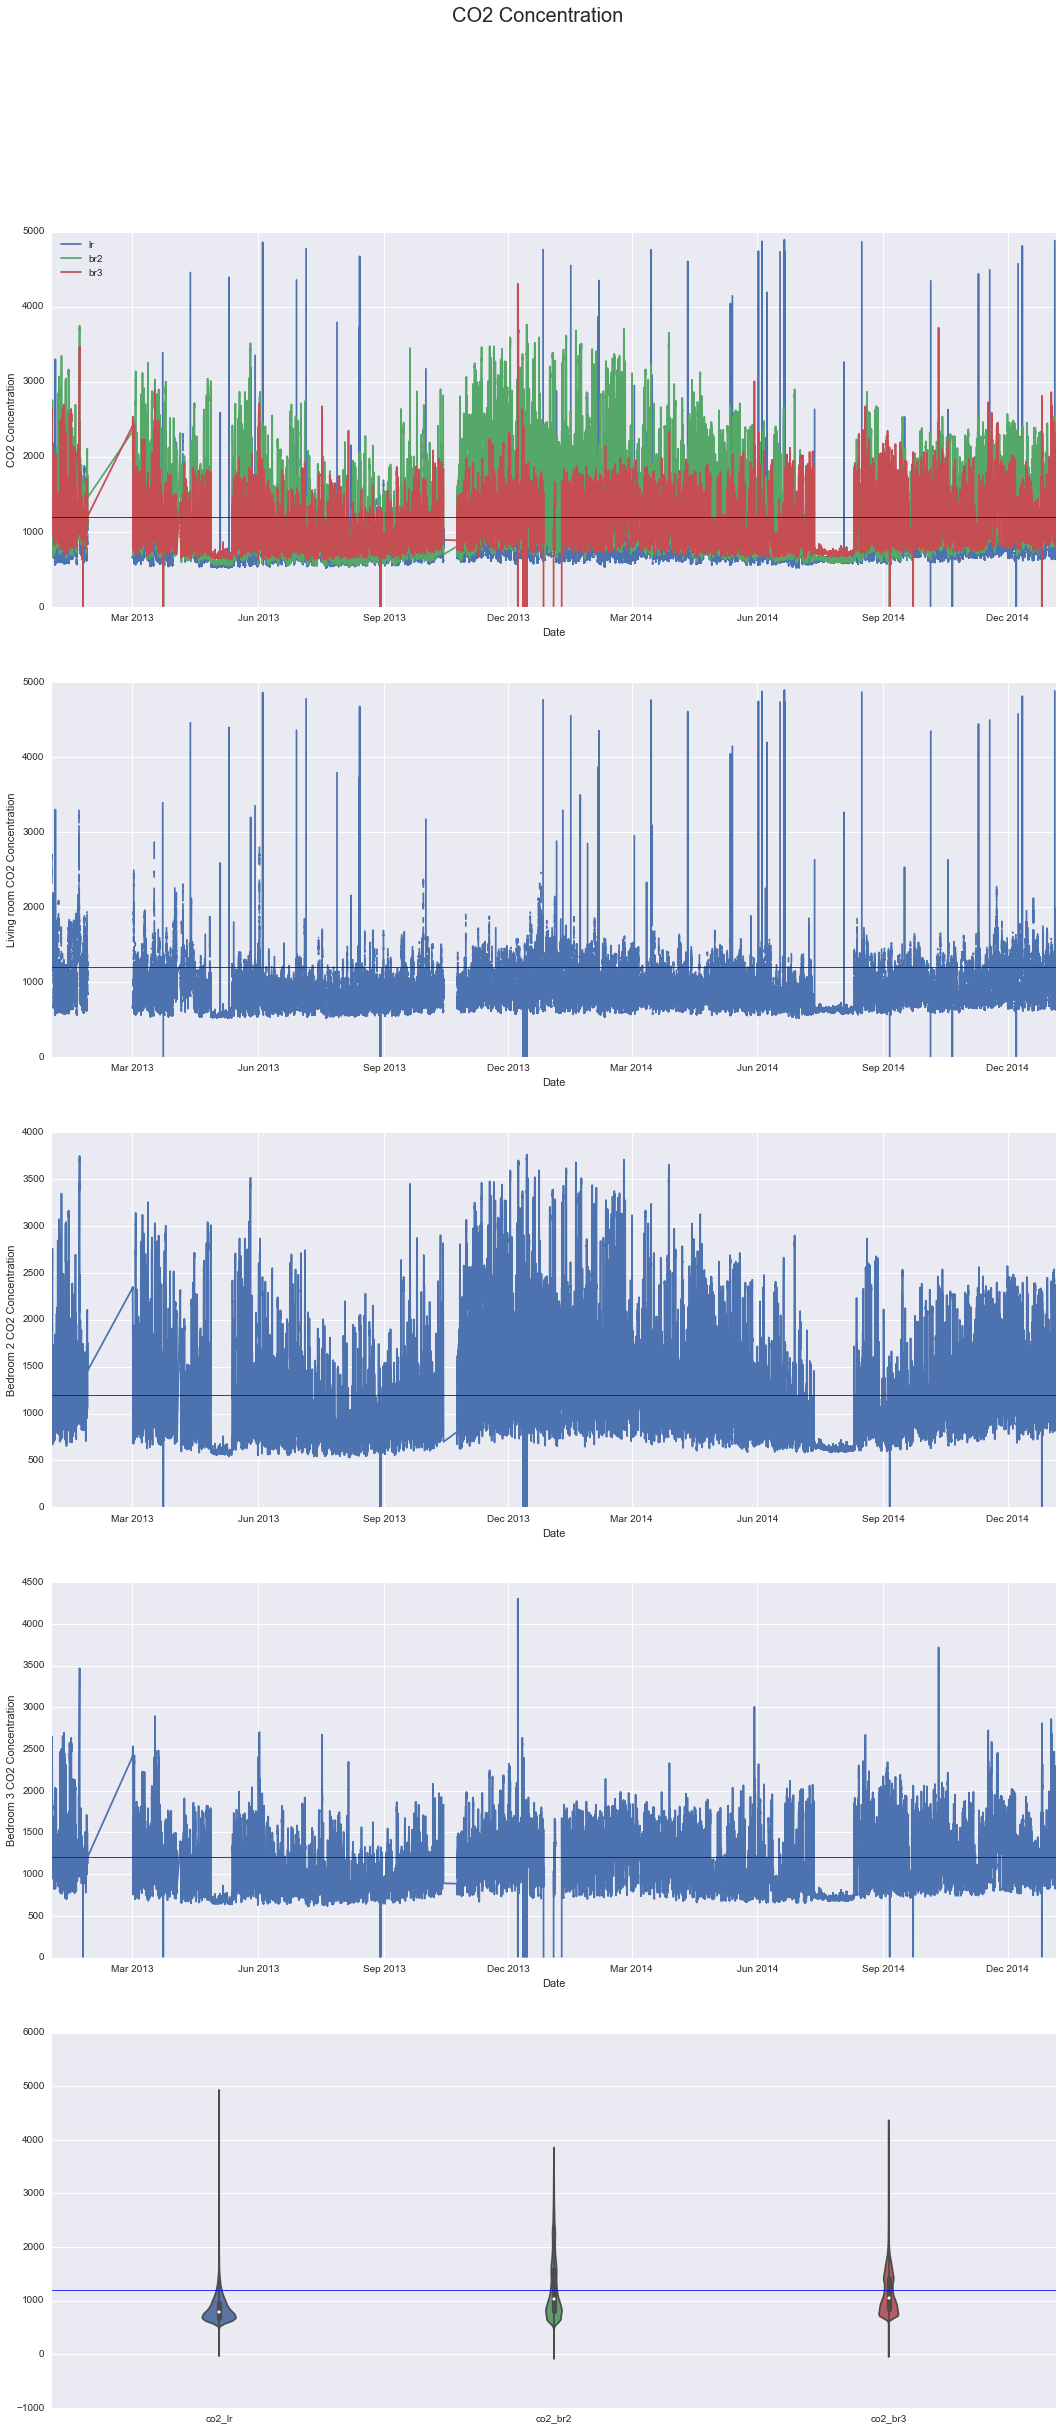

In [5]:
b = benchmark('/Users/xinyuyangren/Documents/TU:e_Year2/Thesis/Aramis_Data_Warehouse/Behavior_Study/0200_Behav.csv')
b.csvload()
b.time_format()
b.t_count()
b.t_plot()
b.co2_count()
b.co2_plot()

{'t_br3_over': 0.06732160279917909, 't_br2_over': 0.07674497557752949, 't_br3_below': 5.811232807161886e-05, 't_lr_below': 3.670252299260138e-05, 't_lr_over': 0.046232944796346875, 't_br2_below': 4.587815374075173e-05}


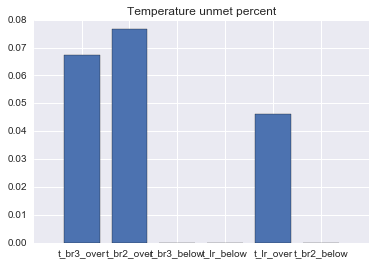

In [9]:
plt.bar(range(len(b.unmet_percent)), b.unmet_percent.values(), align='center',width = 0.75) #from dict create bar chart
plt.xticks(range(len(b.unmet_percent)), b.unmet_percent.keys())
plt.title('Temperature unmet percent')
print b.unmet_percent

{'co2_br2_over': 0.4086825935226164, 'co2_lr_over': 0.056937847335855614, 'co2_br3_over': 0.3878722629858114}


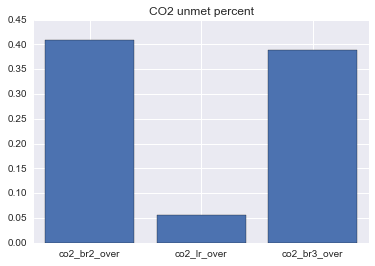

In [10]:
plt.bar(range(len(b.co2_unmet_percent)), b.co2_unmet_percent.values(), align='center') #from dict create bar chart
plt.xticks(range(len(b.co2_unmet_percent)), b.co2_unmet_percent.keys())
plt.title('CO2 unmet percent')
print b.co2_unmet_percent